# Rain and temperature analyze and prediction in Bangladesh

In [ ]:
# importing libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the df
df = pd.read_csv("/content/drive/MyDrive/data.csv")
print(df.head())


       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150


In [ ]:
# some vars
month_labels = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]

In [ ]:
#shape
df.shape

(1474, 4)

In [ ]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1474 non-null   float64
 1   Month   1474 non-null   int64  
 2   Year    1474 non-null   int64  
 3   rain    1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB


In [ ]:
#identifying missing value
df.isnull().sum()

,0
tem,0
Month,0
Year,0
rain,0


In [ ]:
#finding duplicates
df.duplicated().sum()

0

# 2. boxplot of rainfall by month

This plot shows annual monthly avrage rainfall distribution over the years(1901-2021). The plot shows july is the heaviest rainfall month of the year, rain. Heavy rainfall starts in May an continues till September.

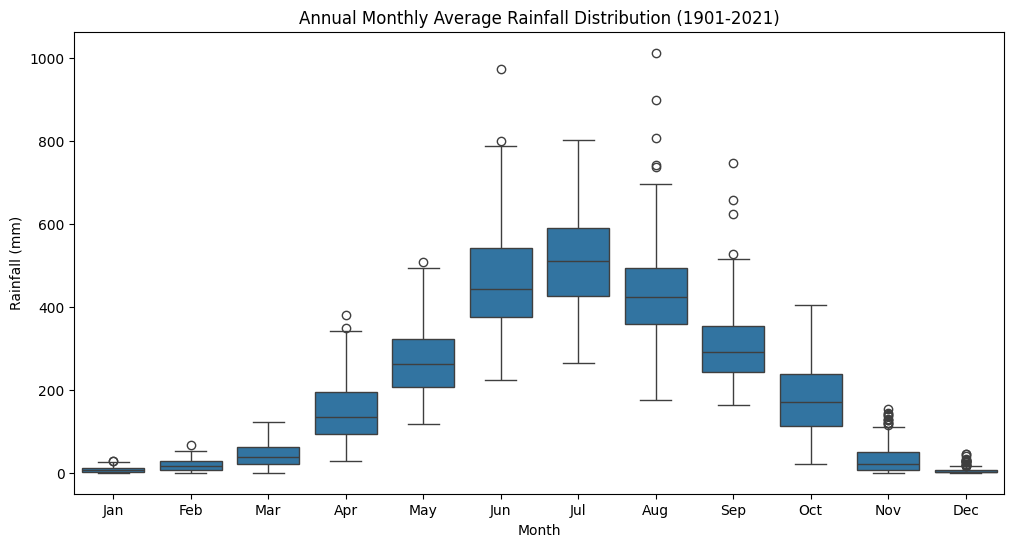

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="rain", data=df)
plt.title("Annual Monthly Average Rainfall Distribution (1901-2021)")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 3. plot temperature by month

This plot shows average monthly temp distribution over the years(1901-2021). The plot shows April-October is the hottest months of the year. Temp starts rising from March, starts decline in November. Dec, Jan and Feb are the coolest months of the year on average.

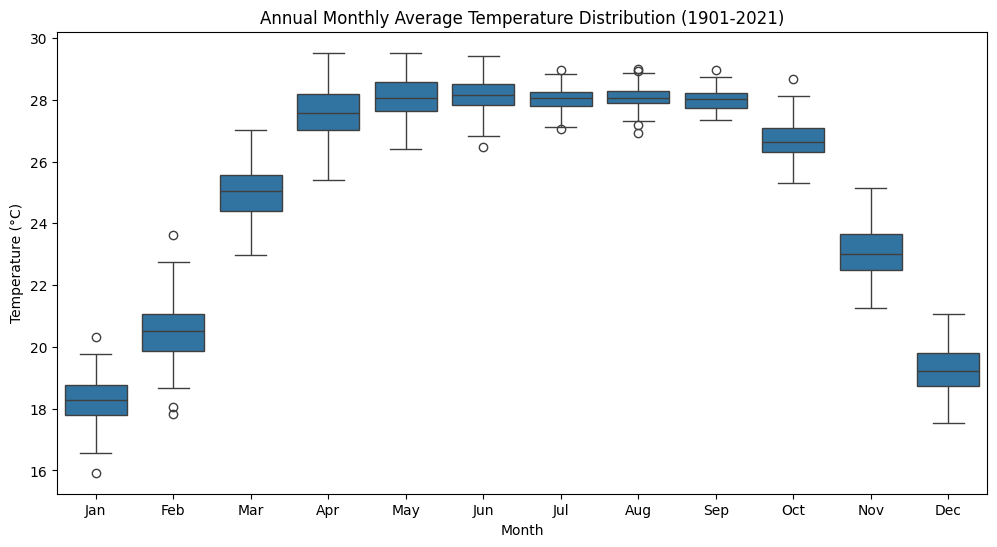

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="tem", data=df)
plt.title("Annual Monthly Average Temperature Distribution (1901-2021)")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(range(0, 12), labels=month_labels)
plt.show()

# 4. plot yearly trend of temperature and rainfall

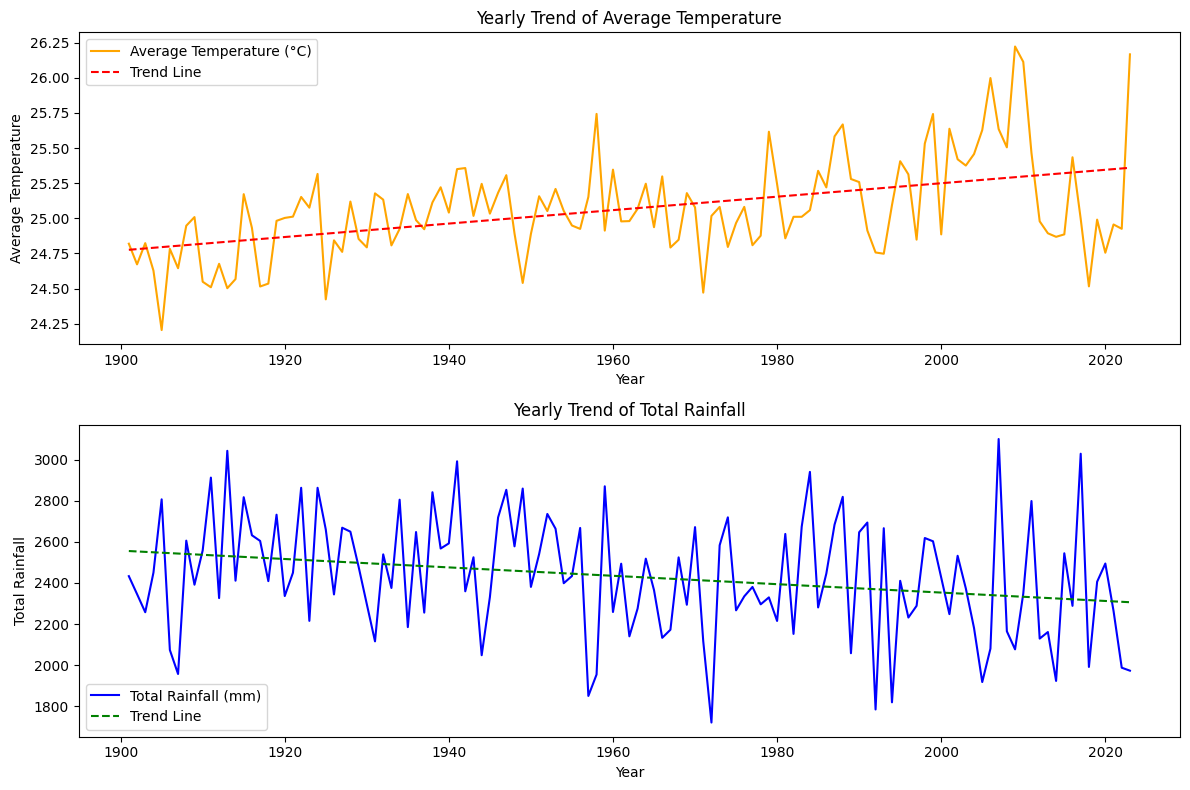

In [ ]:

# Calculate the yearly average for temperature and rainfall
yearly_data = df.groupby("Year").agg({"tem": "mean", "rain": "sum"}).reset_index()

# Rename columns for clarity
yearly_data.columns = ['Year', 'avg_tem', 'total_rain']

# Plot the yearly trend of temperature and rainfall
plt.figure(figsize=(12, 8))

# Plot for Average Temperature
plt.subplot(2, 1, 1)
plt.plot(yearly_data['Year'], yearly_data['avg_tem'], label='Average Temperature (°C)', color='orange')

# Add trend line
z_tem = np.polyfit(yearly_data['Year'], yearly_data['avg_tem'], 1)
p_tem = np.poly1d(z_tem)
plt.plot(yearly_data['Year'], p_tem(yearly_data['Year']), linestyle='--', color='red', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Yearly Trend of Average Temperature')
plt.legend()

# Plot for Total Rainfall
plt.subplot(2, 1, 2)
plt.plot(yearly_data['Year'], yearly_data['total_rain'], label='Total Rainfall (mm)', color='blue')
# Add trend line
z_rain = np.polyfit(yearly_data['Year'], yearly_data['total_rain'], 1)
p_rain = np.poly1d(z_rain)
plt.plot(yearly_data['Year'], p_rain(yearly_data['Year']), linestyle='--', color='green', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.title('Yearly Trend of Total Rainfall')
plt.legend()

plt.tight_layout()
plt.show()


# ML Model

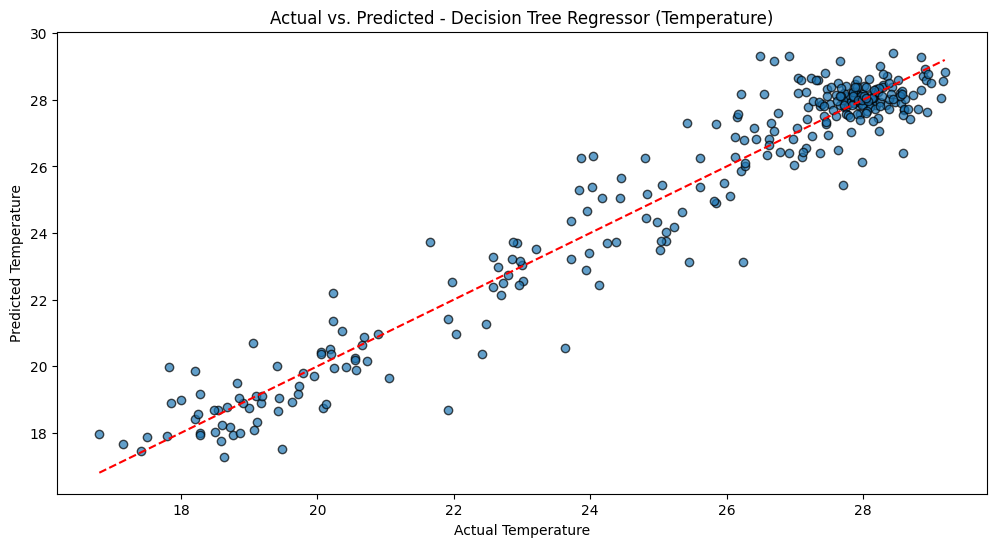

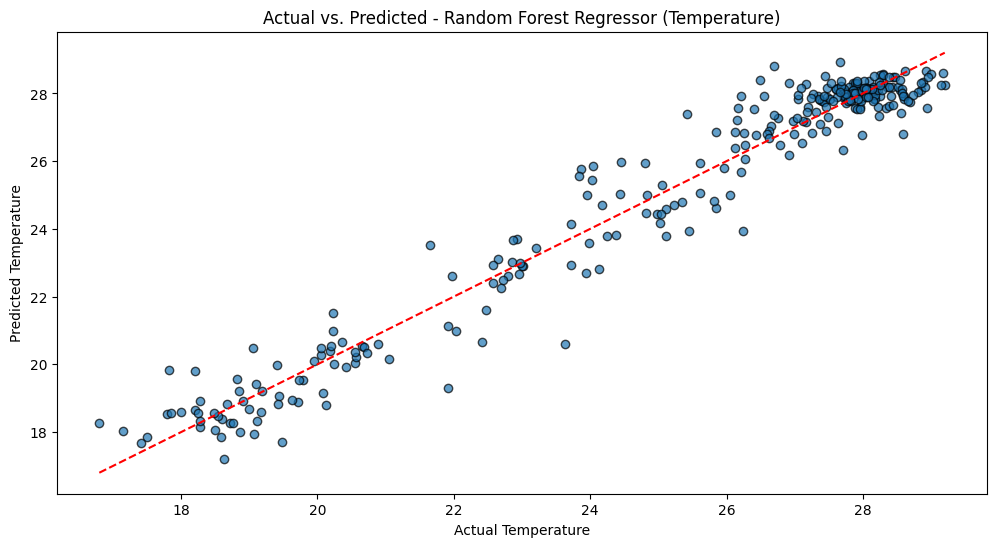

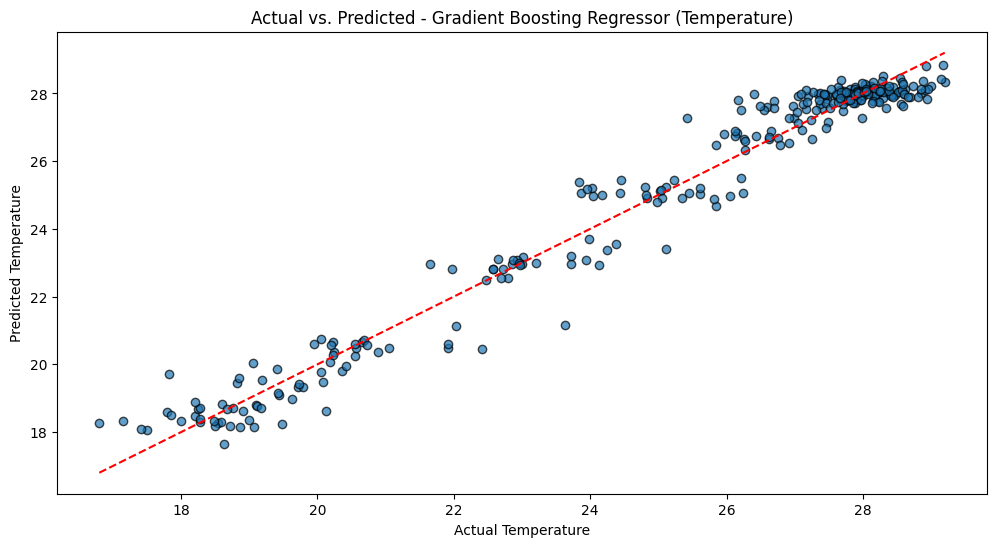

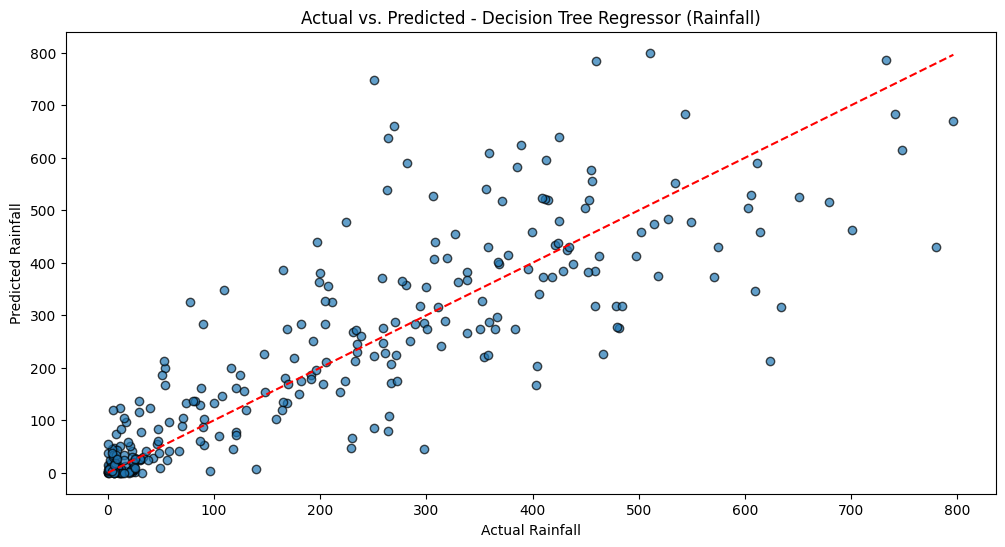

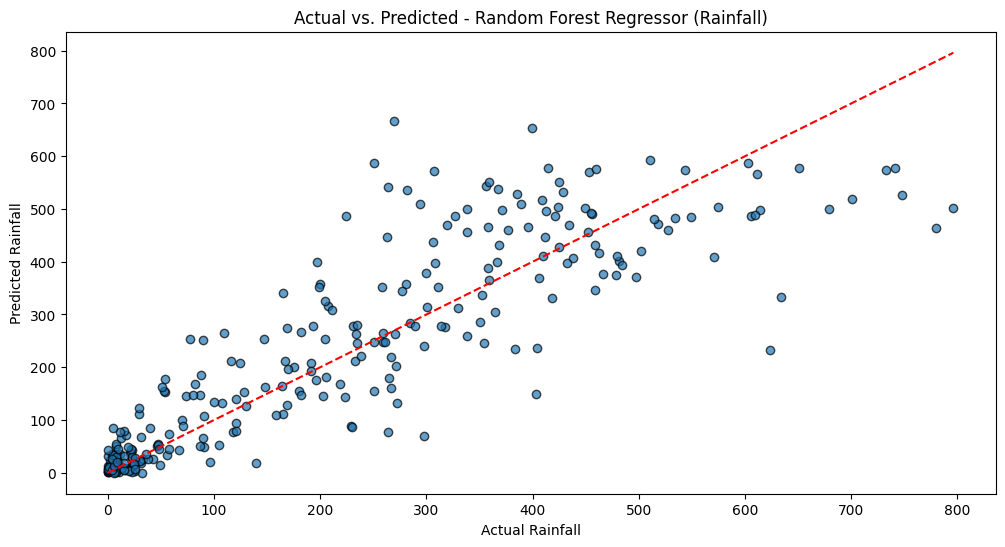

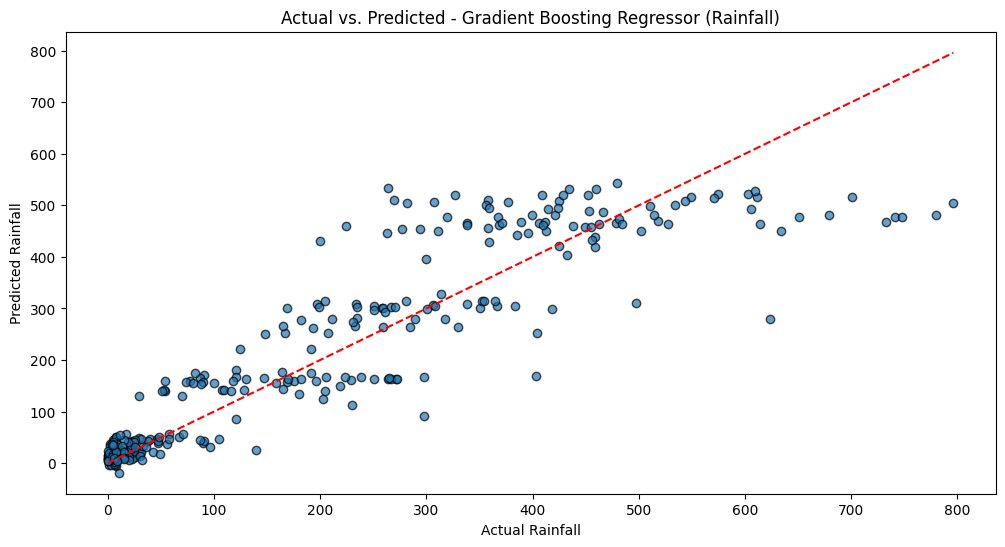

Temperature Prediction Results
                         Model       MAE       MSE        R2
0      Decision Tree Regressor  0.651666  0.792865  0.937121
1      Random Forest Regressor  0.555084  0.561588  0.955463
2  Gradient Boosting Regressor  0.457748  0.376565  0.970136

Rainfall Prediction Results
                         Model        MAE           MSE        R2
0      Decision Tree Regressor  71.173995  12145.716253  0.688809
1      Random Forest Regressor  64.131743   9346.587404  0.760527
2  Gradient Boosting Regressor  57.070914   7210.445656  0.815258


In [ ]:
# Data preparation
features = df[['Month', 'Year']]
target_temp = df['tem']
target_rain = df['rain']

# Split data into training and testing sets
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(features, target_temp, test_size=0.2, random_state=42)
X_train_rain, X_test_rain, y_train_rain, y_test_rain = train_test_split(features, target_rain, test_size=0.2, random_state=42)

# Function to evaluate models and return MAE, MSE, R2, and predictions
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2, y_pred

# Initialize models
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

# Evaluate models for temperature prediction
results_temp = []

for name, model in models.items():
    mae_temp, mse_temp, r2_temp, y_pred_temp = evaluate_model(model, X_train_temp, y_train_temp, X_test_temp, y_test_temp)
    results_temp.append({'Model': name, 'MAE': mae_temp, 'MSE': mse_temp, 'R2': r2_temp})

    # Plot Actual vs. Predicted for Temperature
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_temp, y_pred_temp, edgecolor='k', alpha=0.7)
    plt.plot([y_test_temp.min(), y_test_temp.max()], [y_test_temp.min(), y_test_temp.max()], 'r--')
    plt.title(f'Actual vs. Predicted - {name} (Temperature)')
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.show()

# Evaluate models for rainfall prediction
results_rain = []

for name, model in models.items():
    mae_rain, mse_rain, r2_rain, y_pred_rain = evaluate_model(model, X_train_rain, y_train_rain, X_test_rain, y_test_rain)
    results_rain.append({'Model': name, 'MAE': mae_rain, 'MSE': mse_rain, 'R2': r2_rain})

    # Plot Actual vs. Predicted for Rainfall
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_rain, y_pred_rain, edgecolor='k', alpha=0.7)
    plt.plot([y_test_rain.min(), y_test_rain.max()], [y_test_rain.min(), y_test_rain.max()], 'r--')
    plt.title(f'Actual vs. Predicted - {name} (Rainfall)')
    plt.xlabel('Actual Rainfall')
    plt.ylabel('Predicted Rainfall')
    plt.show()

# Convert results to DataFrame for better visualization
results_temp_df = pd.DataFrame(results_temp)
results_rain_df = pd.DataFrame(results_rain)

# Print the results
print("Temperature Prediction Results")
print(results_temp_df)

print("\nRainfall Prediction Results")
print(results_rain_df)
